In [1]:
import numpy as np
from vorothreshold.read_funcs import read_adjfile, read_voronoi_vide, voro_in_vide_voids, vide_voids_cat
from vorothreshold import voronoi_threshold
from vorothreshold.overlaps import compute_max_dist2, overlapping_fraction, select_overlaps
import pickle
from numba import jit
import matplotlib.pyplot as plt

In [2]:
#Vide info

dataPortion="all"
untrimmed = True
fullName = 'example_observation'
if untrimmed:
    prefix = "untrimmed_"
else:
    prefix = ""

vide_out = 'data/lightcone/examples/example_observation/sample_example_observation/'
adjfile = 'adj_example_observation.dat'

In [3]:
neighbor_ptr, neighbor_ids = read_adjfile(vide_out + adjfile)
print(neighbor_ptr.shape[0],neighbor_ids.shape[0])

ids_voro, VoroVol, VoroXYZ, RA, Dec, redshift = read_voronoi_vide(vide_out,fullName)
print(ids_voro.shape)
Ntot_part = ids_voro.shape[0]

barycenter,radius,redshift_vds,voidID,RA,DEC,coreID,core_dens,core_pos,RAcore,DECcore,redshift_core = vide_voids_cat(vide_out,fullName,
    values_out=['barycenter','radius','redshift','voidID','RA','DEC','core_ID','core_dens','core_pos','RAcore','DECcore','redshift_core'],as_dict=False)
print(barycenter.shape)

164648 1147080
(164647,)
(452, 3)


/mnt/home/gverza/python_venv/base/lib/python3.10/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/home/gverza/python_venv/base/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/mnt/home/gverza/python_venv/base/lib/python3.10/site-packages/numpy/core/getlimits.py:518: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/mnt/home/gverza/python_venv/base/lib/python3.10/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)


[0.00726143 0.01186588 0.01647034 0.02107479 0.02567925 0.03028371
 0.03488816 0.03949262 0.04409707 0.04870153 0.05330598 0.05791044
 0.06251489 0.06711935 0.07172381 0.07632826 0.08093272 0.08553717
 0.09014163 0.09474609 0.09935054 0.103955   0.10855946 0.11316391
 0.11776837 0.12237282 0.12697728 0.13158174 0.1361862  0.14079064
 0.1453951  0.14999956]
38


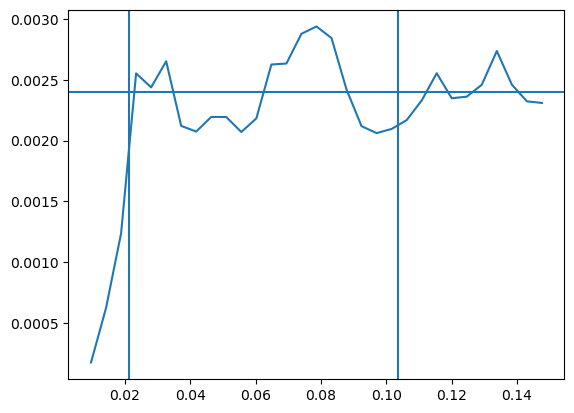

In [4]:
from cosmodata_functions.functions_for_data import ComovingDistanceOverh, ComovingDistanceOverh_explicit
import healpy as hp

mask_gal_file = 'data/lightcone/examples/example_observation/sample_example_observation/mask_map.fits'
mask = hp.read_map(mask_gal_file)
sky_frac = np.sum(mask)/mask.shape[0]
Omega_m = 0.32
w0=-1.
wa=0.
dist_z = ComovingDistanceOverh(Omega_m,w0,wa)
hist_z, z_bins = np.histogram(redshift,bins=31)

comov3 = dist_z.get_dist(z_bins)**3
shell_vol = 4*np.pi/3.*sky_frac*(comov3[1:] - comov3[:-1])
print(z_bins)
z_mean = 0.5 * (z_bins[1:] + z_bins[:-1])
plt.plot(z_mean,hist_z/shell_vol)
plt.axhline(np.mean((hist_z/shell_vol)[3:]))
plt.axvline(z_bins[3])

iv = np.argmax(radius)
print(iv)
ID_core = coreID[iv]
zDens = np.ones(Ntot_part) *np.mean((hist_z/shell_vol)[3:])
plt.axvline(redshift[ID_core])

In [13]:
threshold = [0.3]
ID_core_arr = np.array([ID_core])
print(coreID.shape)
#IDthresholds = np.zeros(Ntot_part,dtype=np.int_)
selected_vsd, ID_voro_dict, Xcm, Vol_interp, Ncells_in_void, ell_eigenvalues, ell_eigenvectors = voronoi_threshold(threshold,coreID,neighbor_ptr,neighbor_ids,VoroXYZ,VoroVol,zDens,nthreads=-1,verbose=True)
print(Xcm.shape)
print(selected_vsd)

(452,)

    nthreads set to 32

    computation started
    done, 0 h 0 min 0.008583545684814453 sec. 

(215, 1, 3)
[  0   4   6   8   9  11  12  13  14  15  19  20  21  24  26  27  28  29
  30  31  32  35  36  38  39  42  43  46  47  49  50  52  53  54  57  62
  63  65  66  69  70  71  73  76  77  78  82  83  84  88  92  93  94  95
  96  97  98 101 102 104 105 107 109 111 114 116 117 120 123 125 126 128
 130 133 134 136 137 144 149 151 155 157 161 162 163 164 165 167 168 169
 170 172 173 176 178 180 181 182 183 187 190 192 194 196 198 202 204 206
 207 208 210 214 215 216 218 220 221 224 225 226 227 228 229 232 234 237
 238 240 243 246 247 248 255 257 259 260 261 263 266 269 270 272 273 274
 275 277 280 282 285 287 289 292 294 295 300 304 306 311 312 314 315 316
 318 320 323 325 326 331 332 336 339 345 346 347 351 353 362 365 367 368
 370 372 373 376 382 385 386 388 392 393 395 399 401 402 403 404 405 406
 410 412 415 416 422 424 425 426 427 430 432 433 437 438 439 443 448]


In [14]:
print(Xcm)

[[[238.92298895 154.68515567 530.25272807]]

 [[161.50184454 649.69100606 469.77458149]]

 [[125.19856079 292.72405912 446.60465715]]

 [[204.00370182 646.47857284 467.41472182]]

 [[303.57265494 616.59451108 638.26821496]]

 [[ 59.61834197 306.7745145  434.59110967]]

 [[266.02610156 407.40930319 805.76194111]]

 [[172.84982484 653.77643662 562.90845329]]

 [[283.23160971 168.50066746 600.6992615 ]]

 [[265.36141925 551.4887957  725.11195875]]

 [[ 34.70551858 398.68691253 453.13519392]]

 [[257.85336118 672.85765056 521.0033374 ]]

 [[185.26199687 200.80549646 592.72885823]]

 [[268.44768749 395.21369833 755.74105155]]

 [[275.45753316 158.86503457 521.21793782]]

 [[204.42697411 342.9747906  668.36257043]]

 [[141.63880249 506.41825085 590.77901904]]

 [[278.32563298 651.73023045 710.10923139]]

 [[166.07302045 588.09915046 607.54464848]]

 [[240.60967623 507.28653118 697.72403359]]

 [[318.86805641 659.40225144 668.15859733]]

 [[154.38996554 603.62620319 480.20527471]]

 [[ 95.930

In [11]:
iv_test = (np.arange(coreID.shape[0])[coreID == 29625])[0]
iv = np.arange(selected_vsd.shape[0])[selected_vsd == iv][0]
print('new iv:',iv)
print(VoroVol[coreID[iv_test]])
print(ID_voro_dict[0].shape)
print(ID_voro_dict[iv][:int(Ncells_in_void[iv]+1)].shape)
print(np.max(Ncells_in_void))


new iv: 23
336.66006
(49394,)
(475,)
474.81436972543776


(215, 1, 3)
(597,)


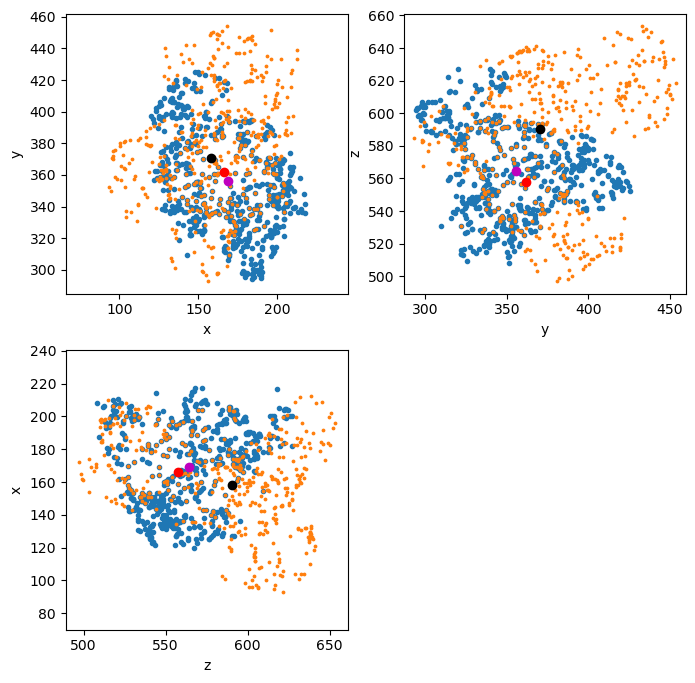

In [12]:

#Unique_IDS = zones2Parts[voidID[iv]].partIDs
print(Xcm.shape)
Xcm_interp = Xcm[iv,0,:]
IDthresholds = ID_voro_dict[iv][:int(Ncells_in_void[iv,0]+1)]
asd = voro_in_vide_voids(vide_out,fullName)
vide_id = selected_vsd[iv]
Unique_IDS = asd.get_voro_from_uniqueID(voidID[vide_id])
print(np.array(Unique_IDS).shape)
fig = plt.figure(figsize=(8,8))
ax = dict()
for i in range(3):
    ax[i] = plt.subplot2grid((2,2), (int(i/2),i%2), rowspan=1, colspan=1)

    ax[i].scatter(VoroXYZ[Unique_IDS,i%3],VoroXYZ[Unique_IDS,(i+1)%3],s=9)
    ax[i].scatter(VoroXYZ[IDthresholds,i%3],VoroXYZ[IDthresholds,(i+1)%3],s=3)
    ax[i].scatter(Xcm_interp[i%3],Xcm_interp[(i+1)%3],c='k')
    ax[i].scatter(core_pos[vide_id,i%3],core_pos[vide_id,(i+1)%3],c='r',)
    ax[i].scatter(barycenter[vide_id,i%3],barycenter[vide_id,(i+1)%3],c='m')
    ax[i].axis('equal')
    ax[i].set_xlabel(['x','y','z'][i%3])
    ax[i].set_ylabel(['x','y','z'][(i+1)%3])

In [16]:
#max_dist_2 = compute_max_dist2(Ncells_in_void[:,0],Xcm[:,0,:],VoroXYZ,ID_voro_dict)
max_dist_2 = compute_max_dist2(Ncells_in_void[:,0],Xcm[:,0,:],VoroXYZ,ID_voro_dict)

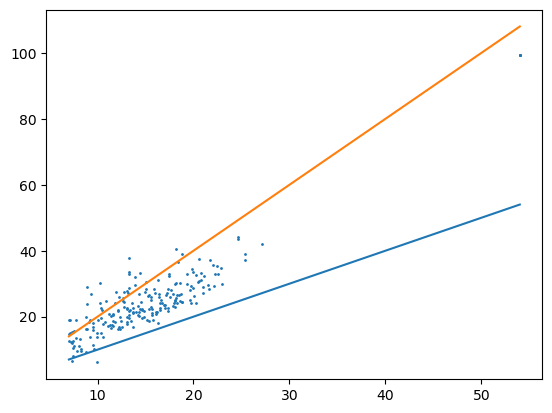

In [17]:
Rth = (Vol_interp[:,0] * 3 / (4.*np.pi)) ** (1/3)
plt.scatter(Rth,max_dist_2**0.5,s=1)
#plt.scatter(radius,max_dist_2**0.5)
plt.plot([np.min(Rth),np.max(Rth)],[np.min(Rth),np.max(Rth)])
plt.plot([np.min(Rth),np.max(Rth)],[2*np.min(Rth),2*np.max(Rth)])



In [18]:
ids_ovlp, Vol_ovlp, Vol_ovlp_frac, num_ovlps = overlapping_fraction(Xcm[:,0,:], Vol_interp[:,0], Ncells_in_void[:,0], VoroXYZ, VoroVol, ID_voro_dict)


IDs_in_sphere started.

    nthreads set to 32

    R2_max computed

    Lbox not passed, using xyz_vds as reference:
    min(xyz_vds) = 34.70551857786532 113.85829433750433 427.2683432667779
    max(xyz_vds) = 331.32019182903076 757.994024385784 805.7619411093509
    Lbox = 644.1357300482796

    ngrid not passed. Set to optimal value: 6

    order_ids_tracers_selected_in_voxels started
    done, 0 h 0 min 0.26039838790893555 sec.

    computation started (periodic-boundaries condition off)
    done, 0 h 0 min 3.407416343688965 sec. 



In [19]:
#id_ovlp = np.arange(num_ovlps.shape[0])[num_ovlps>0]
print(np.max(num_ovlps))
print(num_ovlps[iv],ids_ovlp[iv,:num_ovlps[iv]],Vol_ovlp[iv,:num_ovlps[iv]],Vol_ovlp_frac[iv,:num_ovlps[iv]])

8
8 [ 79 113  72 124  87 185 195 197] [  1077.12329102   4157.88867188   3908.86181641   7549.578125
 659857.875      659857.5625     659857.5625       4727.73583984] [0.03006043 0.06650353 0.09982111 0.1474195  1.         1.
 1.         0.14741816]


(215, 1, 3)


(-0.05500000000000001,
 0.05500000000000001,
 -0.05500000000000001,
 0.05500000000000001)

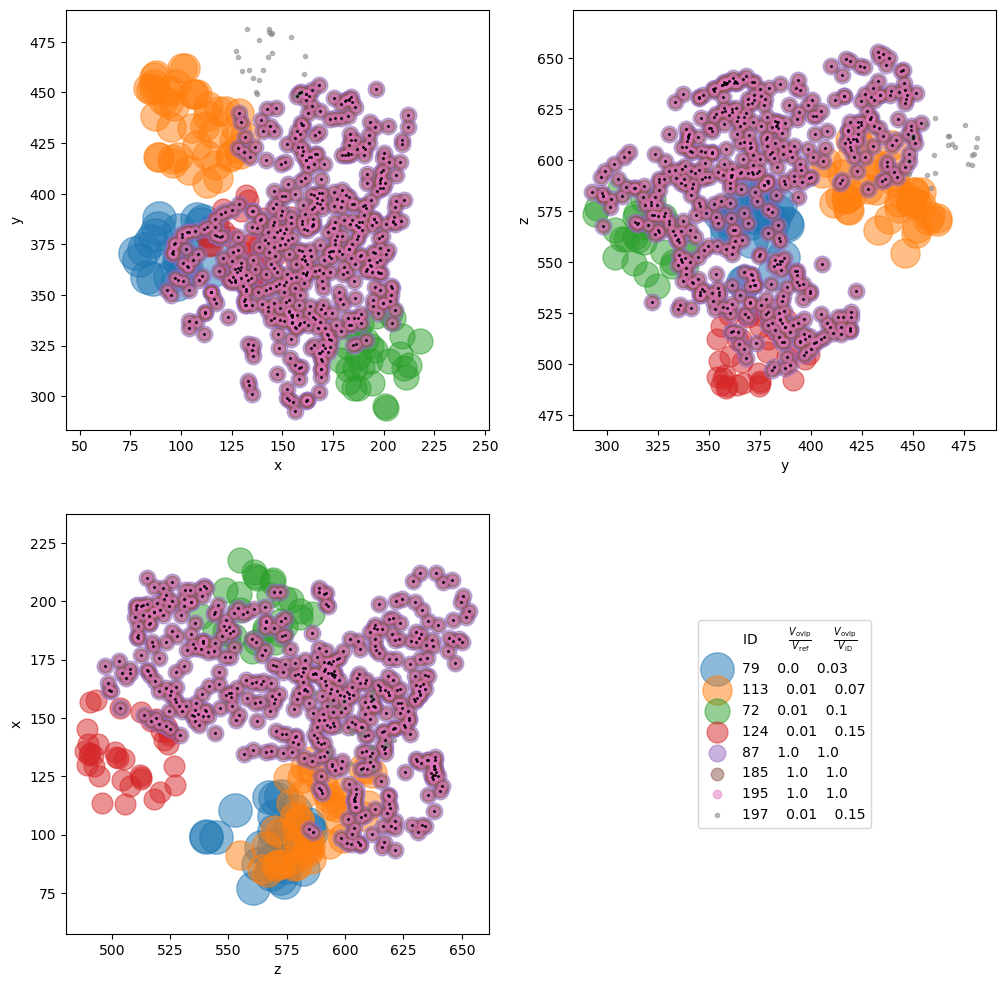

In [20]:
print(Xcm.shape)
asd = voro_in_vide_voids(vide_out,fullName)
Ncells_loop = int(Ncells_in_void[iv,0]) + int(round(Ncells_in_void[iv,0]%1))
Vol_tot_ref = np.sum(VoroVol[ID_voro_dict[iv][:Ncells_loop]])
#print(Vol_tot_ref,Vol_interp[iv,0],Ncells_loop,VoroVol.shape,ID_voro_dict[iv].shape)
fig = plt.figure(figsize=(12,12))
ax = dict()
for i in range(4):
    ax[i] = plt.subplot2grid((2,2), (int(i/2),i%2), rowspan=1, colspan=1)
progr = 0
for id in ids_ovlp[iv,:num_ovlps[iv]]:
    Xcm_interp = Xcm[id,0,:]
    IDthresholds = ID_voro_dict[id][:int(Ncells_in_void[id,0]+1)]

    for i in range(3):
        ax[i].scatter(VoroXYZ[IDthresholds,i%3],VoroXYZ[IDthresholds,(i+1)%3],s=(3*(num_ovlps[iv] - progr))**2,alpha=0.5)
            #ax[i].scatter(Xcm_interp[i%3],Xcm_interp[(i+1)%3])
        #ax[i].scatter(core_pos[iv,i%3],core_pos[iv,(i+1)%3],c='r',)
        #ax[i].scatter(barycenter[iv,i%3],barycenter[iv,(i+1)%3],c='m')
        ax[i].axis('equal')
        ax[i].set_xlabel(['x','y','z'][i%3])
        ax[i].set_ylabel(['x','y','z'][(i+1)%3])
    Ncells_loop = int(Ncells_in_void[id,0]) + int(round(Ncells_in_void[id,0]%1))
    Vol_tot_id = np.sum(VoroVol[ID_voro_dict[id][:Ncells_loop]])
    #print(Vol_ovlp[iv,progr],Vol_ovlp[iv,:8],Vol_tot_id,Vol_tot_id)
    ax[3].scatter([np.nan],[np.nan],s=(3*(num_ovlps[iv] - progr))**2,alpha=0.5,label=str(id)+'    '+str(round(Vol_ovlp[iv,progr]/Vol_tot_ref,2))+
                  '    '+str(round(Vol_ovlp[iv,progr]/Vol_tot_id,2)))
    progr +=1
Xcm_interp = Xcm[iv,0,:]
IDthresholds = ID_voro_dict[iv][:int(Ncells_in_void[iv,0]+1)]
for i in range(3):
    ax[i].scatter(VoroXYZ[IDthresholds,i%3],VoroXYZ[IDthresholds,(i+1)%3],s=1,c='k')
        #ax[i].scatter(Xcm_interp[i%3],Xcm_interp[(i+1)%3])
    #ax[i].scatter(core_pos[iv,i%3],core_pos[iv,(i+1)%3],c='r',)
    #ax[i].scatter(barycenter[iv,i%3],barycenter[iv,(i+1)%3],c='m')
    ax[i].axis('equal')
    ax[i].set_xlabel(['x','y','z'][i%3])
    ax[i].set_ylabel(['x','y','z'][(i+1)%3])
ax[3].legend(loc='center',title='       ID       $\\frac{V_{\\rm ovlp}}{V_{\\rm ref}}$     $\\frac{V_{\\rm ovlp}}{V_{\\rm ID}}$')
ax[3].axis('off')

In [26]:
id_selected = np.arange(Vol_interp.shape[0])[Vol_interp[:,0] > 0]

print(num_ovlps.shape)

import time
t0 = time.time()
id_out = select_overlaps(0.3,id_selected, ids_ovlp, Vol_ovlp_frac, num_ovlps)
print(time.time()-t0)

(215,)
9.846687316894531e-05


: 

In [27]:
print(id_out.shape,id_selected[id_out])




(201,) [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  88  89  90  91
  92  93  94  95  96  97  98 100 101 102 103 104 105 106 107 108 109 110
 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128
 129 130 131 132 133 135 136 137 138 139 140 142 143 144 145 146 147 148
 149 150 151 152 153 154 155 156 157 158 159 161 162 163 166 167 168 169
 171 172 173 174 175 176 177 178 179 180 181 183 186 187 188 189 190 191
 192 193 194 196 197 198 199 200 201 202 204 205 206 207 208 209 210 211
 212 213 214]


: 

(215, 1, 3)


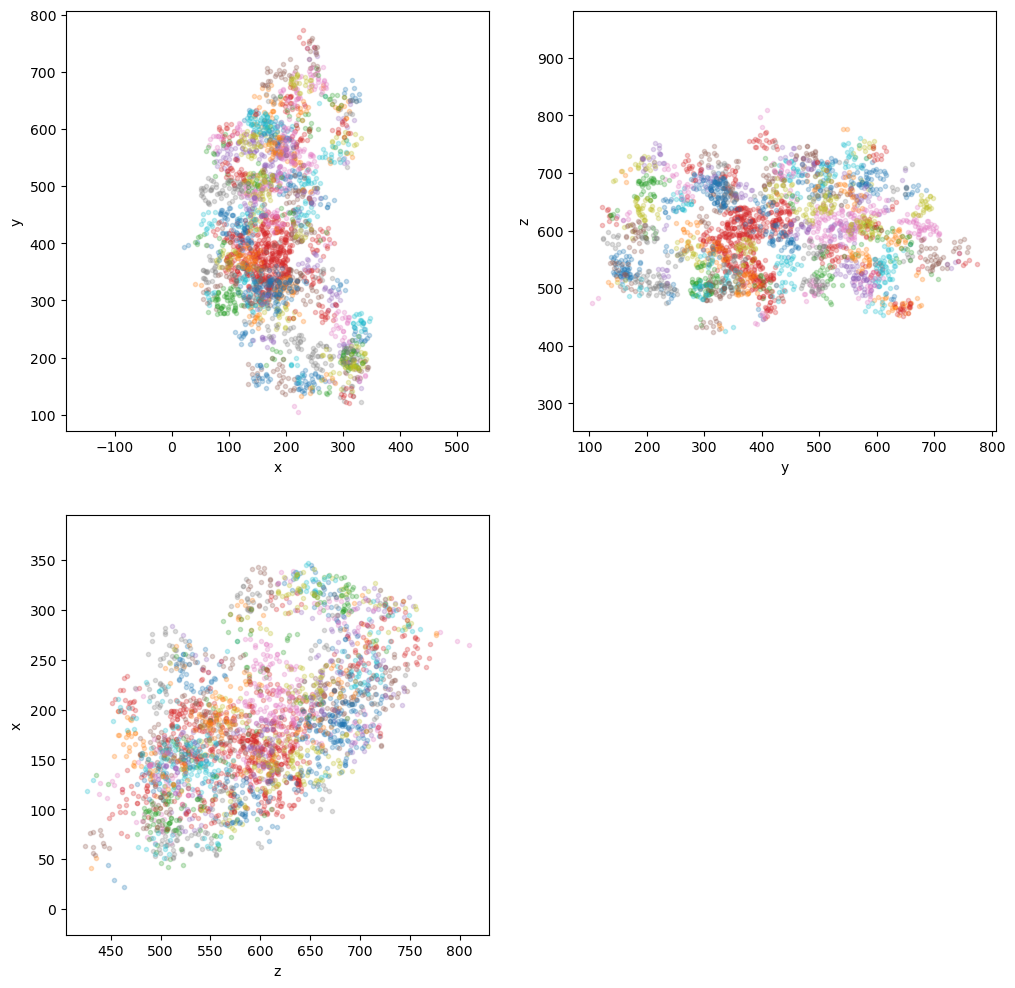

: 

In [28]:
print(Xcm.shape)
asd = voro_in_vide_voids(vide_out,fullName)
Ncells_loop = int(Ncells_in_void[iv,0]) + int(round(Ncells_in_void[iv,0]%1))
Vol_tot_ref = np.sum(VoroVol[ID_voro_dict[iv][:Ncells_loop]])
#print(Vol_tot_ref,Vol_interp[iv,0],Ncells_loop,VoroVol.shape,ID_voro_dict[iv].shape)
fig = plt.figure(figsize=(12,12))
ax = dict()
for i in range(3):
    ax[i] = plt.subplot2grid((2,2), (int(i/2),i%2), rowspan=1, colspan=1)
progr = 0
for id in id_selected[id_out]:
    Xcm_interp = Xcm[id,0,:]
    IDthresholds = ID_voro_dict[id][:int(Ncells_in_void[id,0]+1)]

    for i in range(3):
        ax[i].scatter(VoroXYZ[IDthresholds,i%3],VoroXYZ[IDthresholds,(i+1)%3],s=9,alpha=0.25)
            #ax[i].scatter(Xcm_interp[i%3],Xcm_interp[(i+1)%3])
        #ax[i].scatter(core_pos[iv,i%3],core_pos[iv,(i+1)%3],c='r',)
        #ax[i].scatter(barycenter[iv,i%3],barycenter[iv,(i+1)%3],c='m')
    progr +=1
Xcm_interp = Xcm[iv,0,:]
IDthresholds = ID_voro_dict[iv][:int(Ncells_in_void[iv,0]+1)]
for i in range(3):
    ax[i].axis('equal')
    ax[i].set_xlabel(['x','y','z'][i%3])
    ax[i].set_ylabel(['x','y','z'][(i+1)%3])
#ax[3].legend(loc='center',title='       ID       $\\frac{V_{\\rm ovlp}}{V_{\\rm ref}}$     $\\frac{V_{\\rm ovlp}}{V_{\\rm ID}}$')
#ax[3].axis('off')

: 